# Analysis Content
1. [Data Content](#1)
2. [Import Library](#2)
3. [Data Preprocessing](#3)
4. [Number of books published by century](#4)
5. [Books with the most votes on average](#5)
6. [Most voted books](#6)
7. [Authors who wrote the most books](#7)
8. [Relationship between number of pages and average votes](#8)
9. [WordCloud](#9)
10. [Recommendation Engine](#10)
11. [K-Nearest Neighbors - KNN](#11)
12. [SVD (Singular Value Decomposition)](#12)
13. [Autoencoders](#13)

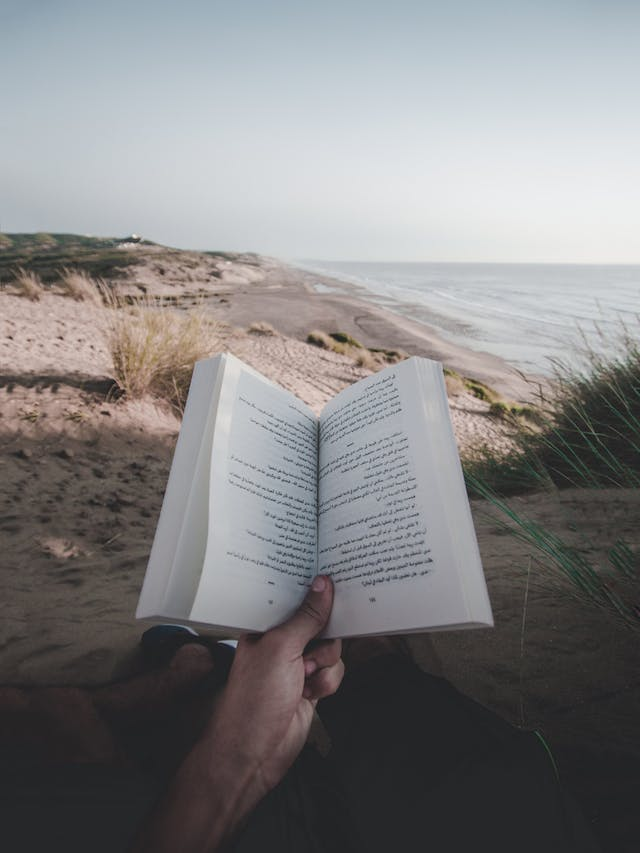

<a id='1'></a>
# Data Content

* **bookID** Contains the unique ID for each book/series
* **title** contains the titles of the books
* **authors** contains the author of the particular book
* **average_rating** the average rating of the books, as decided by the users
* **ISBN** ISBN(10) number, tells the information about a book - such as edition and publisher
* **ISBN13**  The new format for ISBN, implemented in 2007. 13 digits
* **language_code** Tells the language for the books
* **Num_pages Contains** the number of pages for the book
* **Ratings_count** Contains the number of ratings given for the book
* **text_reviews_count** Has the count of reviews left by users
* **publication_date** contains the publication dates of the books
* **publisher** contains publisher names
* **genres** Indicates the genre of books




<a id='2'></a>
# Import Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install tensorflow
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import tensorflow

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id='3'></a>
# Data Preprocessing

In [2]:
book_df=pd.read_csv("books.csv")
book_df.head(5)

bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors average_rating        isbn       isbn13  \
0  J.K. Rowling/Mary GrandPré           4.57   439785960  9.78044E+12   
1  J.K. Rowling/Mary GrandPré           4.49   439358078  9.78044E+12   
2                J.K. Rowling           4.42   439554896  9.78044E+12   
3  J.K. Rowling/Mary GrandPré           4.56  043965548X  9.78044E+12   
4  J.K. Rowling/Mary GrandPré           4.78   439682584  9.78044E+12   

  language_code   num_pages  ratings_count  text_reviews_count  \
0           eng         652        2095690               27591   
1           eng         870        2153167               29221   
2           eng         352           6333                 244   
3           eng         435        2339585               36325   
4           eng        2690          41428                 164   

  publication_date        publisher Unnamed: 12  
0        9/16/2006  Scholastic Inc.         NaN  
1       09-01-2004  Scholastic Inc.         NaN  
2       11-01-2003       Scholastic         NaN  
3       05-01-2004  Scholastic Inc.         NaN  
4        9/13/2004       Scholastic         NaN

In [3]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         3 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [4]:
book_df.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
  num_pages               0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11124
dtype: int64

In [5]:
#book_df = book_df.dropna(subset=['genres'])

In [6]:
#book_df["genres"]=book_df["genres"].apply(lambda x: ';'.join( x.split(';')[:4] ).split(",")[0] )

In [7]:
book_df.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
  num_pages               0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11124
dtype: int64

In [8]:
book_df.title.duplicated().sum()

775

In [9]:
book_df.drop_duplicates(subset='title', keep='first', inplace=True)

In [10]:
book_df.describe()

bookID  ratings_count  text_reviews_count
count  10352.000000   1.035200e+04        10352.000000
mean   21395.462423   1.716329e+04          528.784583
std    13093.122109   1.075652e+05         2499.994166
min        1.000000   0.000000e+00            0.000000
25%    10403.750000   1.060000e+02            9.000000
50%    20674.000000   8.035000e+02           48.000000
75%    32108.500000   5.305000e+03          244.250000
max    45641.000000   4.597666e+06        94265.000000

<a id='4'></a>
# Number of books published by century

In [11]:
def extract_year(date):
    try:
        return int(str(date).split("/")[-1])  # Safely get the year part
    except (IndexError, ValueError):
        return None  # Return None for malformed or missing values

# Apply the function
book_df["publication_year"] = book_df["publication_date"].apply(extract_year)

# Drop rows with missing publication_year or handle them
book_df = book_df.dropna(subset=["publication_year"])

# Add the century column
book_df["century"] = book_df["publication_year"].apply(
    lambda x: "21st century" if x >= 2000 else "20th century"
)


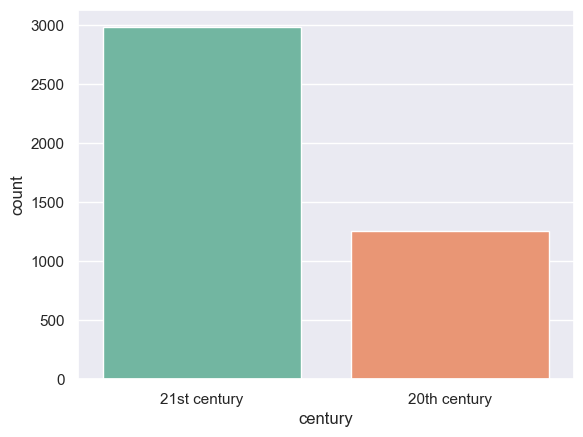

In [12]:
sns.set(style="darkgrid") 
sns.countplot(data=book_df,x="century",palette="Set2")
plt.show()

<a id='5'></a>
# Books with the most votes on average

In [13]:
# Verify data types and clean data
average_vote_book = average_vote_book[pd.to_numeric(average_vote_book["average_rating"], errors="coerce").notnull()]
average_vote_book["title"] = average_vote_book["title"].fillna("Unknown Title")

# Plot the data
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=average_vote_book, x="average_rating", y="title", palette="magma")

# Adjust y-axis labels for long titles
plt.gca().set_yticklabels(
    [label[:35] + '...' if len(label) > 35 else label for label in average_vote_book["title"]]
)

# Customize plot
ax.set_xlabel("Average Rating", color="red", fontsize=10)
ax.set_ylabel("Book Title", color="blue", fontsize=10)
plt.title("Top 20 Books by Average Rating", fontsize=14)
plt.show()


NameError: name 'average_vote_book' is not defined

<a id='6'></a>
# Most voted books

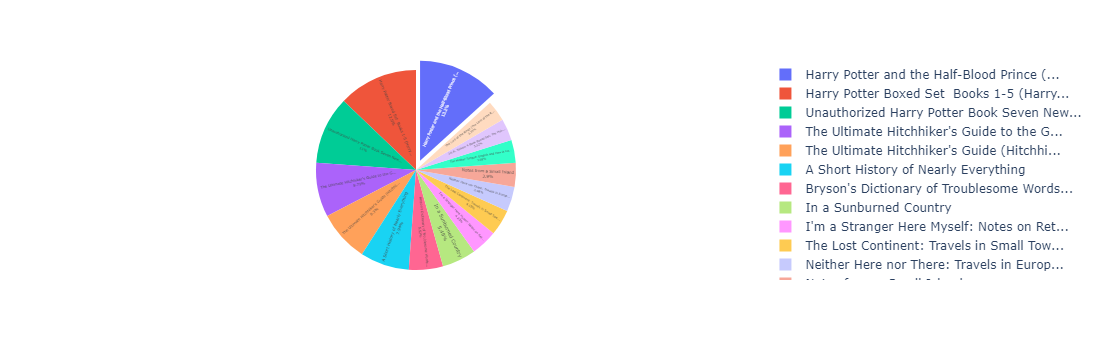

In [14]:
top_15=book_df.sort_values(by="ratings_count",ascending=False)[:15]
top_15=top_15.ratings_count.reset_index()

fig = px.pie(top_15,values="ratings_count",names=[i[:40]+"..."if len(i)>40 else i for i in book_df.iloc[top_15.index].title])
fig.update_traces(pull=[0.1, 0, 0, 0],textposition="inside",textinfo="percent+label")
fig.show()


<a id='7'></a>
# Authors who wrote the most books

In [15]:
book_df.authors.value_counts()

authors
Orson Scott Card                           20
P.G. Wodehouse                             19
Piers Anthony                              17
Rumiko Takahashi                           17
Janet Evanovich                            14
                                           ..
Arien Mack/Irvin Rock                       1
Ellis Weiner/Barbara Davilman/Gabi Payn     1
Pearson Scott Foresman/William S. Gray      1
Philip K. Dick/Lawrence Sutin               1
William T. Vollmann                         1
Name: count, Length: 3037, dtype: int64

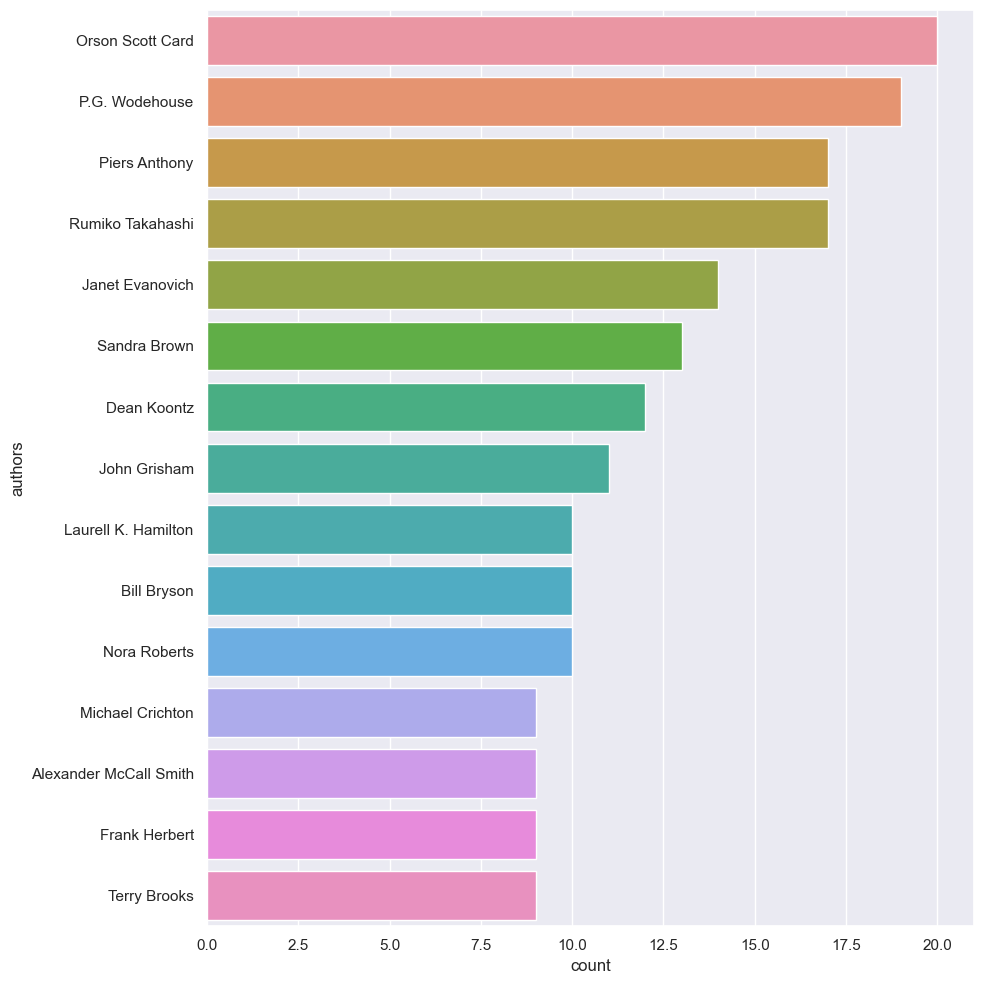

In [16]:
book_df["Author"]=book_df.authors.apply(lambda x: str(x).split("/")[0])
number_book=book_df.authors.value_counts().reset_index()[:15]
plt.figure(figsize=(10,10))
sns.barplot(data=number_book,y="authors",x="count")
plt.tight_layout()
plt.show()

<a id='8'></a>
# Relationship between number of pages and average votes

In [17]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=book_df, y='num_pages', x='average_rating',hue="century")
plt.tight_layout()

ValueError: Could not interpret value `num_pages` for parameter `y`

<Figure size 500x500 with 0 Axes>

<a id='9'></a>
# WordCloud

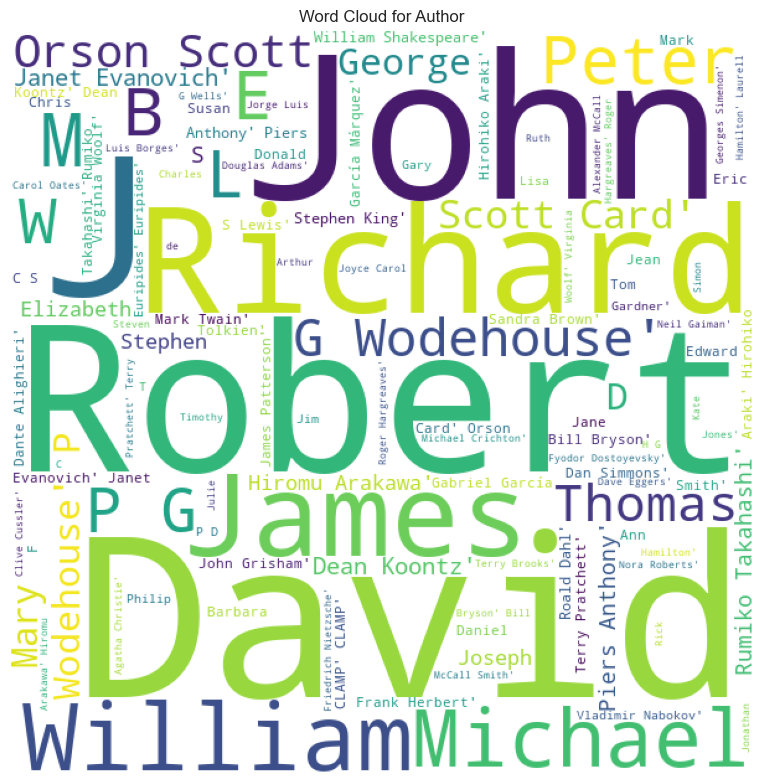

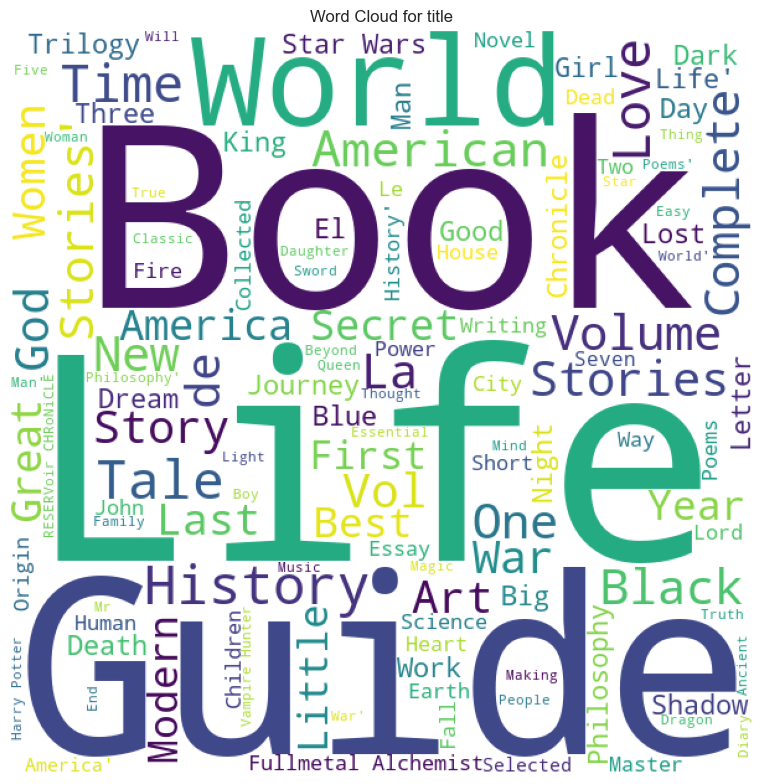

In [18]:
!pip install wordcloud
from wordcloud import WordCloud

for i in ["Author","title"]:
    text=str(list(book_df[i]))
    plt.rcParams['figure.figsize'] = (8, 8)
    wordcloud = WordCloud(background_color = 'white', width = 600,  height = 600, max_words = 121).generate(text)
    plt.title(f"Word Cloud for {i}")
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

<a id='10'></a>
# Recommendation Engine

In [19]:
book_df.head()

bookID                                              title  \
0        1  Harry Potter and the Half-Blood Prince (Harry ...   
4        8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
5        9  Unauthorized Harry Potter Book Seven News: "Ha...   
8       13  The Ultimate Hitchhiker's Guide to the Galaxy ...   
11      18  The Ultimate Hitchhiker's Guide (Hitchhiker's ...   

                       authors average_rating       isbn       isbn13  \
0   J.K. Rowling/Mary GrandPré           4.57  439785960  9.78044E+12   
4   J.K. Rowling/Mary GrandPré           4.78  439682584  9.78044E+12   
5       W. Frederick Zimmerman           3.74  976540606  9.78098E+12   
8                Douglas Adams           4.38  345453743  9.78035E+12   
11               Douglas Adams           4.38  517149257  9.78052E+12   

   language_code   num_pages  ratings_count  text_reviews_count  \
0            eng         652        2095690               27591   
4            eng        2690          41428                 164   
5          en-US         152             19                   1   
8            eng         815         249558                4080   
11           eng         815           2877                 195   

   publication_date        publisher Unnamed: 12  publication_year  \
0         9/16/2006  Scholastic Inc.         NaN            2006.0   
4         9/13/2004       Scholastic         NaN            2004.0   
5         4/26/2005     Nimble Books         NaN            2005.0   
8         4/30/2002    Del Rey Books         NaN            2002.0   
11        1/17/1996      Wings Books         NaN            1996.0   

         century                  Author  
0   21st century            J.K. Rowling  
4   21st century            J.K. Rowling  
5   21st century  W. Frederick Zimmerman  
8   21st century           Douglas Adams  
11  20th century           Douglas Adams

In [20]:
data=book_df.copy()

In [21]:
# Convert 'average_rating' to numeric, coercing invalid values to NaN
data['average_rating'] = pd.to_numeric(data['average_rating'], errors='coerce')

# Now apply the conditional assignment
data.loc[(data["average_rating"] >= 0) & (data["average_rating"] <= 1), "rating_between"] = "between_0_to_1"
data.loc[(data["average_rating"] > 1) & (data["average_rating"] <= 2), "rating_between"] = "between_1_to_2"
data.loc[(data["average_rating"] > 2) & (data["average_rating"] <= 3), "rating_between"] = "between_2_to_3"

# Check the updated dataframe
print(data.head())


    bookID                                              title  \
0        1  Harry Potter and the Half-Blood Prince (Harry ...   
4        8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
5        9  Unauthorized Harry Potter Book Seven News: "Ha...   
8       13  The Ultimate Hitchhiker's Guide to the Galaxy ...   
11      18  The Ultimate Hitchhiker's Guide (Hitchhiker's ...   

                       authors  average_rating       isbn       isbn13  \
0   J.K. Rowling/Mary GrandPré            4.57  439785960  9.78044E+12   
4   J.K. Rowling/Mary GrandPré            4.78  439682584  9.78044E+12   
5       W. Frederick Zimmerman            3.74  976540606  9.78098E+12   
8                Douglas Adams            4.38  345453743  9.78035E+12   
11               Douglas Adams            4.38  517149257  9.78052E+12   

   language_code   num_pages  ratings_count  text_reviews_count  \
0            eng         652        2095690               27591   
4            eng        2690  

In [22]:
between_df=data["rating_between"].str.get_dummies(",")
between_df

between_0_to_1  between_1_to_2  between_2_to_3  nan
0                   0               0               0    1
4                   0               0               0    1
5                   0               0               0    1
8                   0               0               0    1
11                  0               0               0    1
...               ...             ...             ...  ...
11116               0               0               0    1
11117               0               0               0    1
11122               0               0               0    1
11125               0               0               0    1
11126               0               0               0    1

[4234 rows x 4 columns]

In [23]:
language_df=data["language_code"].str.get_dummies(",")
language_df.head()

9.78067E+12  9.78085E+12  9.78156E+12  9.78159E+12  ara  en-CA  en-GB  \
0             0            0            0            0    0      0      0   
4             0            0            0            0    0      0      0   
5             0            0            0            0    0      0      0   
8             0            0            0            0    0      0      0   
11            0            0            0            0    0      0      0   

    en-US  eng  fre  ...  grc  ita  jpn  lat  mul  por  rus  spa  wel  zho  
0       0    1    0  ...    0    0    0    0    0    0    0    0    0    0  
4       0    1    0  ...    0    0    0    0    0    0    0    0    0    0  
5       1    0    0  ...    0    0    0    0    0    0    0    0    0    0  
8       0    1    0  ...    0    0    0    0    0    0    0    0    0    0  
11      0    1    0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 22 columns]

In [24]:
# genres_df=data["genres"].str.get_dummies(";")
# genres_df.head()

In [25]:
engine_features=pd.concat([between_df,language_df,data["average_rating"],data["ratings_count"]],axis=1)
engine_features

between_0_to_1  between_1_to_2  between_2_to_3  nan  9.78067E+12  \
0                   0               0               0    1            0   
4                   0               0               0    1            0   
5                   0               0               0    1            0   
8                   0               0               0    1            0   
11                  0               0               0    1            0   
...               ...             ...             ...  ...          ...   
11116               0               0               0    1            0   
11117               0               0               0    1            0   
11122               0               0               0    1            0   
11125               0               0               0    1            0   
11126               0               0               0    1            0   

       9.78085E+12  9.78156E+12  9.78159E+12  ara  en-CA  ...  jpn  lat  mul  \
0                0            0            0    0      0  ...    0    0    0   
4                0            0            0    0      0  ...    0    0    0   
5                0            0            0    0      0  ...    0    0    0   
8                0            0            0    0      0  ...    0    0    0   
11               0            0            0    0      0  ...    0    0    0   
...            ...          ...          ...  ...    ...  ...  ...  ...  ...   
11116            0            0            0    0      0  ...    0    0    0   
11117            0            0            0    0      0  ...    0    0    0   
11122            0            0            0    0      0  ...    0    0    0   
11125            0            0            0    0      0  ...    0    0    0   
11126            0            0            0    0      0  ...    0    0    0   

       por  rus  spa  wel  zho  average_rating  ratings_count  
0        0    0    0    0    0            4.57        2095690  
4        0    0    0    0    0            4.78          41428  
5        0    0    0    0    0            3.74             19  
8        0    0    0    0    0            4.38         249558  
11       0    0    0    0    0            4.38           2877  
...    ...  ...  ...  ...  ...             ...            ...  
11116    1    0    0    0    0            4.03            211  
11117    1    0    0    0    0            3.92            207  
11122    0    0    0    0    0            4.06            156  
11125    0    0    0    0    0            3.72            769  
11126    0    0    1    0    0            3.91            113  

[4234 rows x 28 columns]

In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
engine_features = min_max_scaler.fit_transform(engine_features)

<a id='11'></a>
# K-Nearest Neighbors - KNN

In [50]:
from sklearn.impute import SimpleImputer

# Initialize the imputer to fill NaN values with the column mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer and transform the data
engine_features_imputed = imputer.fit_transform(engine_features)
engine_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
# Fit the model on the imputed data
engine_model.fit(engine_features_imputed)
dist, idlist = engine_model.kneighbors(engine_features_imputed)


In [51]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_list_genre= []
    book_id = data[data['title'] == book_name].index
    book_id = book_id[0]
   
    for newid in idlist[book_id]:
        book_list_name.append(data.iloc[newid].title)
        
    return book_list_name

In [52]:
from colorama import Fore, Style
for i in data.title.values[:30]:
    print("book name: ",i)
    print()
    book_list_name = book_recommendation_engine(i)
    print()
    for i in range(len(book_list_name)):
        
        print("recommediton name: ",book_list_name[i])
       
    print("********************************")
    print("\n\n\n")

book name:  Harry Potter and the Half-Blood Prince (Harry Potter  #6)


recommediton name:  Harry Potter and the Half-Blood Prince (Harry Potter  #6)
recommediton name:  The Hobbit  or There and Back Again
recommediton name:  The Catcher in the Rye
recommediton name:  The Da Vinci Code (Robert Langdon  #2)
recommediton name:  The Giver (The Giver  #1)
********************************




book name:  Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)


recommediton name:  The Ultimate Hitchhiker's Guide (Hitchhiker's Guide to the Galaxy  #1-5)
recommediton name:  Blue at the Mizzen (Aubrey & Maturin #20)
recommediton name:  Azumanga Daioh  Vol. 3 (Azumanga Daioh  #3)
recommediton name:  Complete Tales and Poems
recommediton name:  Just Above My Head
********************************




book name:  Unauthorized Harry Potter Book Seven News: "Half-Blood Prince" Analysis and Speculation


recommediton name:  A Short History of Nearly Everything
recommediton name:  A Little Princess
rec

<a id='12'></a>
# SVD (Singular Value Decomposition)

In [61]:
from scipy.sparse.linalg import svds
import numpy as np

# Assuming engine_features is a numpy array or sparse matrix
engine_features = np.random.rand(100, 50)  # Example matrix for illustration

# Get the minimum dimension and adjust k
min_dim = min(engine_features.shape)
k = min_dim - 1  # Set k to the largest valid value

# Perform SVD
U, sigma, Vt = svds(engine_features, k=k)

# Reconstruct the approximate matrix
engine_features_predicted = np.dot(np.dot(U, np.diag(sigma)), Vt)
print("SVD successfully completed!")
engine_features_predicted = np.dot(np.dot(U, np.diag(sigma)), Vt)
sample_books = engine_features_predicted[22]
books_indices = np.argsort(np.linalg.norm(engine_features_predicted - sample_books, axis=1))[1:45]
print("recommend book name: ",data.iloc[22].title,data.iloc[22][:3])
for i in books_indices:
    print("indexes of similar books:", data.iloc[i].title, Fore.RED + str(data.iloc[i][:3])+ Style.RESET_ALL)
    print()


SVD successfully completed!
recommend book name:  The Known World bookID                  67
title      The Known World
authors    Edward P. Jones
Name: 39, dtype: object
indexes of similar books: Reinventing the Enemy's Language: Contemporary Native Women's Writings of North America bookID                                                   484
title      Reinventing the Enemy's Language: Contemporary...
authors    Joy Harjo/Gloria Bird/Beth Cuthand/Valerie Mar...
Name: 207, dtype: object

indexes of similar books: Dinner with Anna Karenina bookID                           159
title      Dinner with Anna Karenina
authors             Gloria Goldreich
Name: 96, dtype: object

indexes of similar books: Mapping the Big Picture: Integrating Curriculum & Assessment K-12 bookID                                                    92
title      Mapping the Big Picture: Integrating Curriculu...
authors                                   Heidi Hayes Jacobs
Name: 58, dtype: object

indexes of similar

<a id='13'></a>
# Autoencoders

In [62]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [67]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example data
engine_features = np.random.rand(100, 50)  # Dataset with 100 samples, 50 features

# Standardize the data
scaler = StandardScaler()
engine_features = scaler.fit_transform(engine_features)

# Split into train and test sets
train_features, test_features = train_test_split(engine_features, test_size=0.2, random_state=42)

# Adjust the input dimensions dynamically
input_dim = train_features.shape[1]

# Define the autoencoder
input_data = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_data)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(
    train_features, 
    train_features, 
    epochs=250, 
    batch_size=16, 
    shuffle=True, 
    validation_data=(test_features, test_features)
)


Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - loss: 0.7443 - val_loss: 0.6750
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6261 - val_loss: 0.5965
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5303 - val_loss: 0.5240
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4453 - val_loss: 0.4580
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3610 - val_loss: 0.3971
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2856 - val_loss: 0.3404
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2000 - val_loss: 0.2874
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1240 - val_loss: 0.2377
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0462 - val_loss: 0.1912
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0184 - val_loss: 0.1472
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: -0.0625 - val_loss: 0.1049
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: -0.1223 - val

In [68]:
from sklearn.neighbors import NearestNeighbors

encoded_train_features = autoencoder.predict(engine_features)

knn = NearestNeighbors(n_neighbors=25, metric='euclidean')
knn.fit(encoded_train_features)

sample_book = 0 
distances, indices = knn.kneighbors(encoded_train_features[sample_book].reshape(1, -1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [71]:
print("recommend book name: ",data.loc[sample_book].title,data.loc[sample_book][:4])
print()
for i in indices.flatten():
    print("indexes of similar books:", data.iloc[i].title, Fore.RED + str(data.iloc[i][:4])+ Style.RESET_ALL)
    print()

recommend book name:  Harry Potter and the Half-Blood Prince (Harry Potter  #6) bookID                                                            1
title             Harry Potter and the Half-Blood Prince (Harry ...
authors                                  J.K. Rowling/Mary GrandPré
average_rating                                                 4.57
Name: 0, dtype: object

indexes of similar books: Harry Potter and the Half-Blood Prince (Harry Potter  #6) bookID                                                            1
title             Harry Potter and the Half-Blood Prince (Harry ...
authors                                  J.K. Rowling/Mary GrandPré
average_rating                                                 4.57
Name: 0, dtype: object

indexes of similar books: I am Charlotte Simmons bookID                               231
title             I am Charlotte Simmons
authors                        Tom Wolfe
average_rating                      3.42
Name: 118, dtype: object

index

In [73]:
from flask import Flask, request, render_template, redirect, url_for, flash
import numpy as np
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)
app.secret_key = "supersecretkey"

# Global variables
autoencoder = None
scaler = None
input_dim = None

# Route to the home page
@app.route("/")
def home():
    return render_template("index.html")

# Route to handle training
@app.route("/train", methods=["POST"])
def train():
    global autoencoder, scaler, input_dim

    # Read uploaded file
    if "file" not in request.files:
        flash("No file uploaded!")
        return redirect(url_for("home"))

    file = request.files["file"]
    if file.filename == "":
        flash("No selected file!")
        return redirect(url_for("home"))

    try:
        # Load the dataset
        data = pd.read_csv('books.csv')
        engine_features = data.values

        # Standardize the features
        scaler = StandardScaler()
        engine_features = scaler.fit_transform(engine_features)

        # Split into train and test sets
        train_features, test_features = train_test_split(engine_features, test_size=0.2, random_state=42)

        # Get the input dimension
        input_dim = train_features.shape[1]

        # Define the autoencoder model
        input_data = Input(shape=(input_dim,))
        encoded = Dense(128, activation="relu")(input_data)
        decoded = Dense(input_dim, activation="sigmoid")(encoded)
        autoencoder = Model(input_data, decoded)
        autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

        # Train the autoencoder
        autoencoder.fit(
            train_features,
            train_features,
            epochs=10,  # Set to 250 for full training
            batch_size=16,
            shuffle=True,
            validation_data=(test_features, test_features),
            verbose=2,
        )

        flash("Model trained successfully!")
        return redirect(url_for("home"))

    except Exception as e:
        flash(f"Error: {e}")
        return redirect(url_for("home"))

# Route to handle predictions
@app.route("/predict", methods=["POST"])
def predict():
    global autoencoder, scaler, input_dim

    if autoencoder is None or scaler is None:
        flash("Model not trained yet!")
        return redirect(url_for("home"))

    try:
        # Parse input features
        input_data = request.form["features"]
        features = np.array([float(x) for x in input_data.split(",")]).reshape(1, -1)

        if features.shape[1] != input_dim:
            flash(f"Input features should have {input_dim} dimensions.")
            return redirect(url_for("home"))

        # Scale the input and predict
        scaled_features = scaler.transform(features)
        reconstruction = autoencoder.predict(scaled_features)

        # Display results
        flash(f"Reconstructed Output: {reconstruction.flatten().tolist()}")
        return redirect(url_for("home"))

    except Exception as e:
        flash(f"Error: {e}")
        return redirect(url_for("home"))

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1